# 🍄 Proyecto VIII – Análisis Exploratorio (EDA) del Mushroom Dataset 
**Autor:** Alfonso Bermúdez  
**Bootcamp IA – Proyecto Individual (2025)**

En este notebook se lleva a cabo el **análisis exploratorio de datos (EDA)** sobre el *Mushroom Dataset* del repositorio de la UCI con un enfoque didáctico y visual sobre aprendizaje ML supervisado y no supervisado.

**Dataset original UCI:**
`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"`

El objetivo es comprender la estructura de los datos del dataset, identificar valores faltantes, preparar las variables categóricas y dejar el conjunto de datos listo para aplicar técnicas de **aprendizaje no supervisado (PCA + K-Means)** y un modelo **supervisado (Random Forest)** para comparación.



## Paso 1: Visualización del dataset original (nombres abreviados) + Descripción inicial del dataset
Antes de renombrar las columnas, se muestra el dataset tal como se obtiene desde la fuente original UCI, desde `../data/agaricus-lepiota.data`, con nombres abreviados.
Esto permite identificar la estructura original y comprender por qué es necesario aplicar nombres descriptivos posteriormente.

Exploramos también: Dimensiones, tipo de variables, valores únicos y si existen valores faltantes representados por él símbolo `'?'` por columna.



In [4]:
import pandas as pd, os

# Original Dataset path from UCI Machine Learning Repository
DATA_PATH = "../data/agaricus-lepiota.data"

# Carga el conjunto de datos (sin cabeceras) en el dataframe de pandas df_original
df_original = pd.read_csv(DATA_PATH, header=None)

# Muestra las primeras filas del dataframe original sin cabeceras
print("Vista previa del dataset ORIGINAL (sin cabeceras):")
display(df_original.head())

# Dimensiones del dataset
print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")

# Tipos de datos por columna
print('\nValores únicos por columna :')
print(df.nunique().sort_values().head(23))

# Conteo de valores faltantes representados por '?'
missing = (df == '?').sum().sort_values(ascending=False)
print('\nConteo de faltantes representados por ? por columna:')
print(missing[missing>0])



Vista previa del dataset ORIGINAL (sin cabeceras):


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Número de filas: 8124, Número de columnas: 23

Valores únicos por columna :
veil-type                    1
class                        2
gill-attachment              2
gill-spacing                 2
stalk-shape                  2
gill-size                    2
bruises                      2
ring-number                  3
stalk-surface-above-ring     4
veil-color                   4
cap-surface                  4
stalk-surface-below-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
odor                         9
stalk-color-above-ring       9
stalk-color-below-ring       9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

Conteo de faltantes representados por ? por columna:
stalk-root    2480
dtype: int64


## Paso 2: Importaciones, configuración visual y renombrado de columnas con nombres oficiales UCI
En esta sección se cargan las librerías necesarias, se configura el estilo visual uniforme (basado en `seaborn`) y se renombran las columnas con nombres oficiales y descriptivos de la especie de hongo según la documentación del dataset UCI para evitar confusiones.


In [5]:

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
from IPython.display import Markdown, display



sns.set_theme(style="whitegrid", context="talk")

plt.rcParams.update({"figure.figsize": (10,4), "axes.titlesize": 14, "axes.titleweight": "bold"})



uci_cols = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',

        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',

        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',

        'stalk-surface-below-ring', 'stalk-color-above-ring',

        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',

        'ring-type', 'spore-print-color', 'population', 'habitat']


# Carga el dataset con nombres oficiales de columnas
df = pd.read_csv(DATA_PATH, header=None, names=uci_cols)

display(Markdown("**Vista previa del dataset con NOMBRES OFICIALES:**"))
display(df.head())

print(f"Shape: {df.shape}")



**Vista previa del dataset con NOMBRES OFICIALES:**

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Shape: (8124, 23)


## Paso 3: Balance inicial de clases
Analizamos la distribución de la variable objetivo (`class`), que distingue entre hongos comestibles (`e`) y venenosos (`p`).
Esto permite verificar si el dataset está equilibrado antes del modelado.


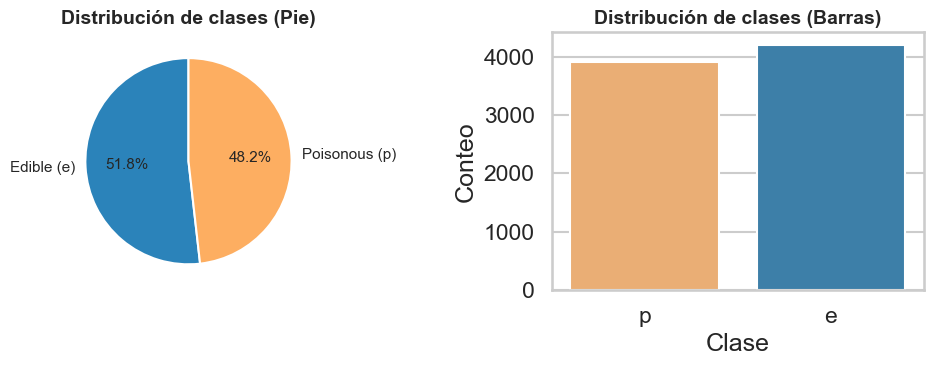

**Interpretación:** El conjunto de datos está prácticamente balanceado entre ambas clases, con una ligera mayoría de hongos comestibles. Esto es beneficioso para el modelado, ya que reduce el riesgo de sesgo hacia una clase específica.

In [8]:
palette_binary = {'e': '#2b83ba', 'p': '#fdae61'}

label_map = {'e': 'Edible (e)', 'p': 'Poisonous (p)'}

cls_counts = df['class'].map(label_map).value_counts()


# Pie para visualización de la distribución de clases (comestible vs venenoso)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(cls_counts.values, labels=cls_counts.index, autopct='%1.1f%%',

            startangle=90, colors=[palette_binary['e'], palette_binary['p']],

            textprops={'fontsize': 11})

axes[0].set_title("Distribución de clases (Pie)")


# Bar plot (histograma) para visualización de la distribución de clases
sns.countplot(x='class', hue='class', data=df, palette=palette_binary, legend=False, ax=axes[1])
axes[1].set_title("Distribución de clases (Barras)")
axes[1].set_xlabel("Clase"); axes[1].set_ylabel("Conteo")
plt.tight_layout(); plt.show()



display(Markdown("**Interpretación:** El conjunto de datos está prácticamente balanceado entre ambas clases, con una ligera mayoría de hongos comestibles. Esto es beneficioso para el modelado, ya que reduce el riesgo de sesgo hacia una clase específica."))





## Paso 4: Detección de valores faltantes
Se inspeccionan los valores faltantes representados por el carácter `'?'`. El objetivo es identificar qué columnas presentan información incompleta y valorar cómo tratarlas.


In [9]:
missing = (df == '?').sum()

display(Markdown("**Columnas con valores faltantes detectadas:**"))

display(missing[missing > 0])



**Columnas con valores faltantes detectadas:**

stalk-root    2480
dtype: int64

## Paso 5: Comparativa de estrategias para la variable `stalk-root ('?')`
La variable `stalk-root` contiene valores faltantes representados por `'?'`. 
Esto puede deberse a registros incompletos en el origen del dataset.  

Se evalúan **cuatro estrategias**:
1. Mantener los datos originales (con `'?'`).
2. Eliminar las filas que contienen `'?'`.
3. Imputar los valores faltantes usando la moda de la columna.
4. Eliminar la columna `stalk-root` por completo.

En esta comparativa visual, analizamos el impacto de cada enfoque en la distribución de clases (`edible` vs `poisonous`).

El propósito es observar el impacto de cada enfoque en la distribución de clases.
Aquella con menos impacto es la que se escoge (que será imputar con la moda o eliminar directamente esa columna, que influye menos que eliminar sólo las líneas con valor `?`.)


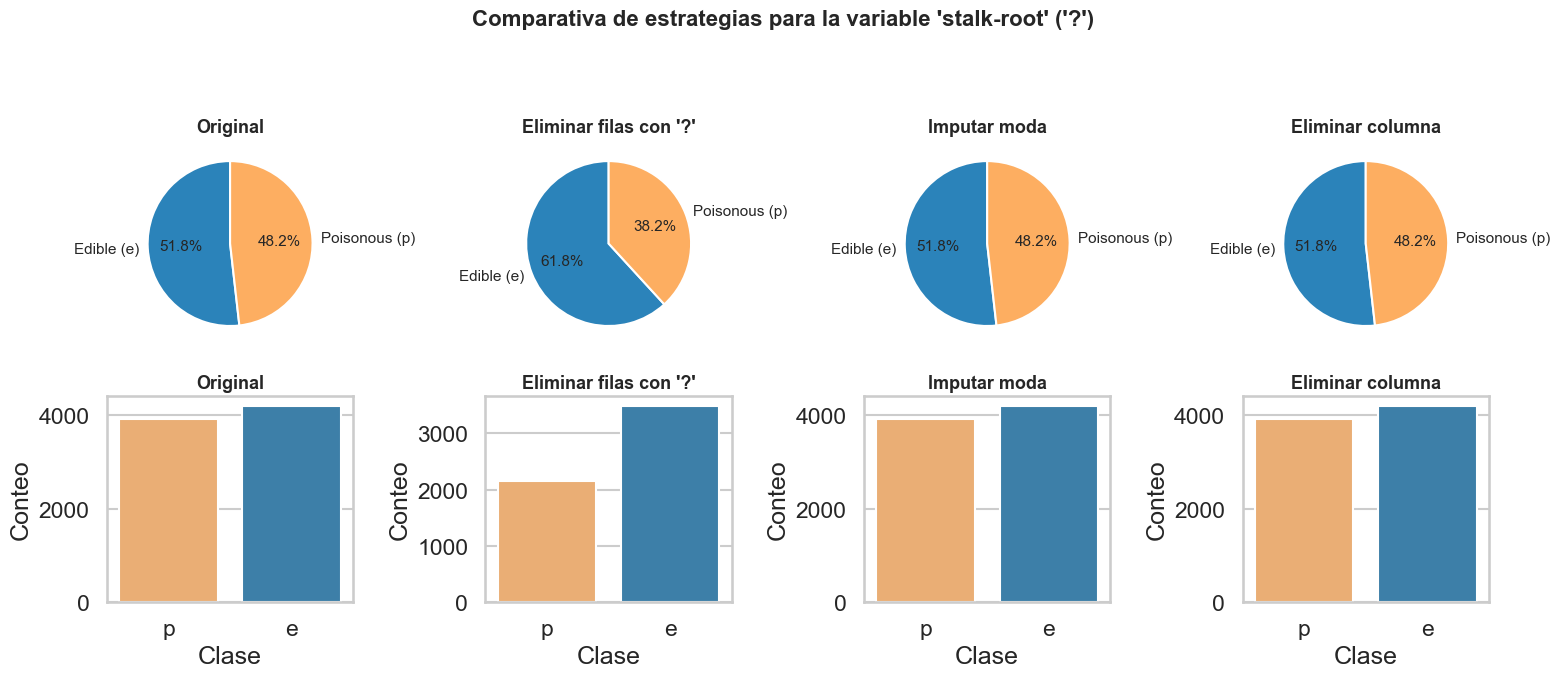


**Conclusión:**
Tras analizar las cuatro estrategias:
- Eliminar las filas con `'?'` reduce significativamente el tamaño del dataset y altera el balance de clases.  
- Eliminar la columna completa provoca pérdida de información potencialmente útil, ya que `stalk-root` podría estar relacionada con la clase (`edible` o `poisonous`).  
- Imputar con la **moda** conserva tanto el tamaño del dataset como el equilibrio original entre clases.

Por ello, **se adopta la imputación por moda** como el método óptimo para el tratamiento de los valores faltantes en esta variable.


In [22]:
## Paso 5: Comparativa de estrategias para la variable 'stalk-root' ('?')

# Creamos las diferentes versiones del dataset según la estrategia de tratamiento
df_drop_rows = df[df['stalk-root'] != '?'].copy()

df_impute = df.copy()
df_impute['stalk-root'] = df_impute['stalk-root'].replace('?', np.nan)
mode_val = df_impute['stalk-root'].mode()[0]
df_impute['stalk-root'] = df_impute['stalk-root'].fillna(mode_val)

df_drop_col = df.drop(columns=['stalk-root'])

datasets = [
    ('Original', df),
    ("Eliminar filas con '?'", df_drop_rows),
    ("Imputar moda", df_impute),
    ("Eliminar columna", df_drop_col)
]

# Visualización comparativa
fig, axes = plt.subplots(2, 4, figsize=(16, 7))
fig.suptitle("Comparativa de estrategias para la variable 'stalk-root' ('?')",
             fontsize=16, fontweight='bold')

for i, (title, data) in enumerate(datasets):
    # Gráfico circular
    vals = data['class'].value_counts()
    axes[0, i].pie(vals.values, labels=['Edible (e)', 'Poisonous (p)'],
                   autopct='%1.1f%%', startangle=90,
                   colors=[palette_binary['e'], palette_binary['p']],
                   textprops={'fontsize': 11})
    axes[0, i].set_title(title, fontsize=13)

    # Gráfico de barras
    sns.countplot(x='class', hue='class', data=data,
                  palette=palette_binary, legend=False, ax=axes[1, i])
    axes[1, i].set_title(title, fontsize=13)
    axes[1, i].set_xlabel("Clase")
    axes[1, i].set_ylabel("Conteo")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Conclusión mostrada tras los gráficos en formato Markdown
display(Markdown("""
**Conclusión:**
Tras analizar las cuatro estrategias:
- Eliminar las filas con `'?'` reduce significativamente el tamaño del dataset y altera el balance de clases.  
- Eliminar la columna completa provoca pérdida de información potencialmente útil, ya que `stalk-root` podría estar relacionada con la clase (`edible` o `poisonous`).  
- Imputar con la **moda** conserva tanto el tamaño del dataset como el equilibrio original entre clases.

Por ello, **se adopta la imputación por moda** como el método óptimo para el tratamiento de los valores faltantes en esta variable.
"""))




## Paso 6: Análisis y visualización de la variable constante `veil-type`
La variable `veil-type` muestra un único valor `'p'` (partial) para todas las observaciones. Esto significa que no aporta información útil para la clasificación y debe eliminarse. A continuación se muestra su distribución para confirmar esta falta de variabilidad.


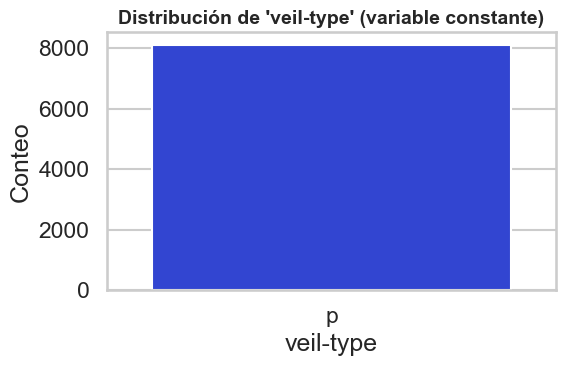

**Conclusión:** Todas las setas presentan `veil-type = 'p'` (partial). La variable carece de variabilidad y se elimina.**

In [11]:
import seaborn as sns, matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.countplot(x='veil-type', hue='veil-type', data=df_impute, palette=["#1831eb"], legend=False)

plt.title("Distribución de 'veil-type' (variable constante)")

plt.xlabel("veil-type"); plt.ylabel("Conteo")

plt.tight_layout(); plt.show()



df_clean = df_impute.drop(columns=['veil-type'])

display(Markdown("**Conclusión:** Todas las setas presentan `veil-type = 'p'` (partial). "

                 "La variable carece de variabilidad y se elimina.**"))



## Paso 7: Distribución de variables clave y caso especial `cap-shape = 's'`
En esta fase se examina la distribución de las principales variables categóricas que influyen en la clasificación: `odor`, `gill-size`, `ring-type`, `spore-print-color` y `habitat`. Además, se analiza el caso de `cap-shape = 's'` (sunken), una categoría extremadamente rara que puede distorsionar el modelo.


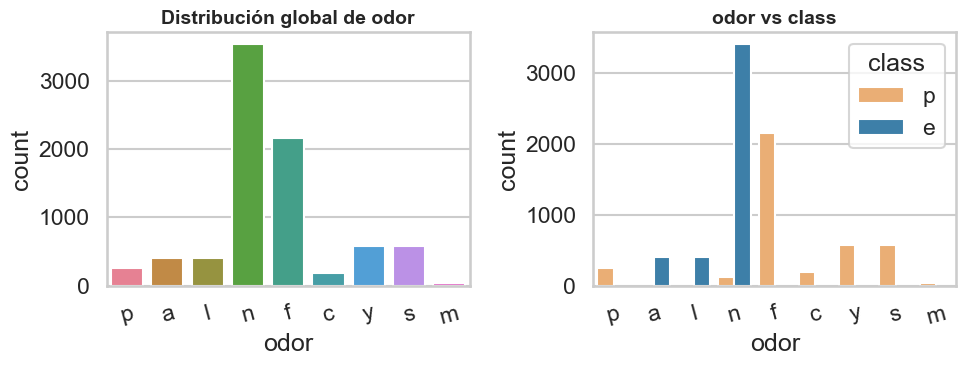

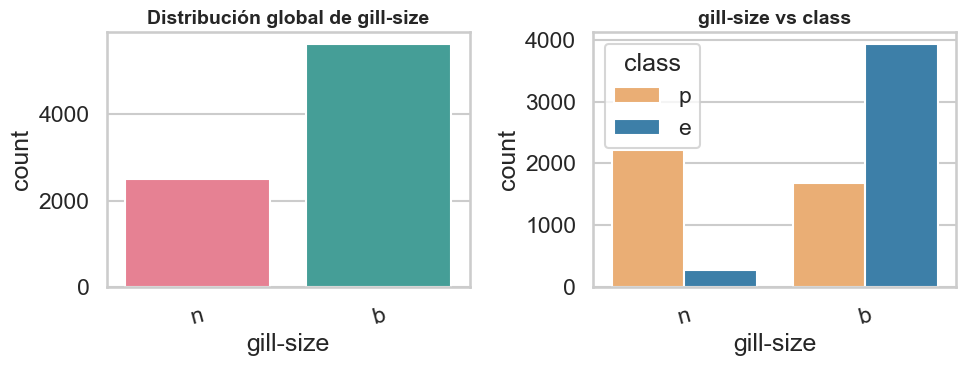

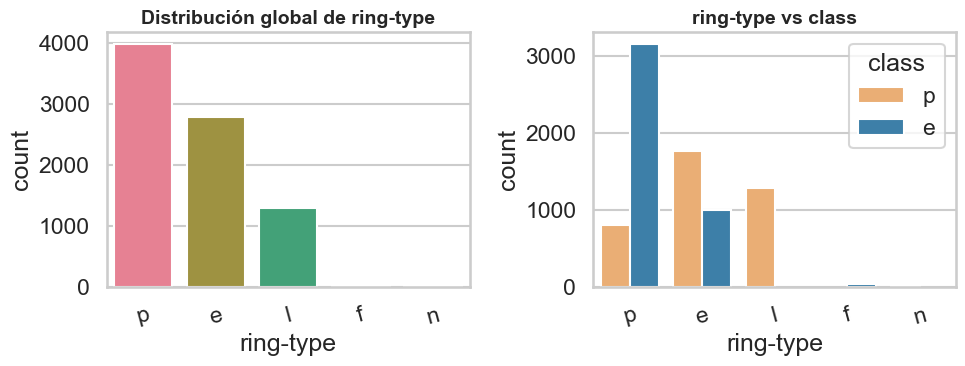

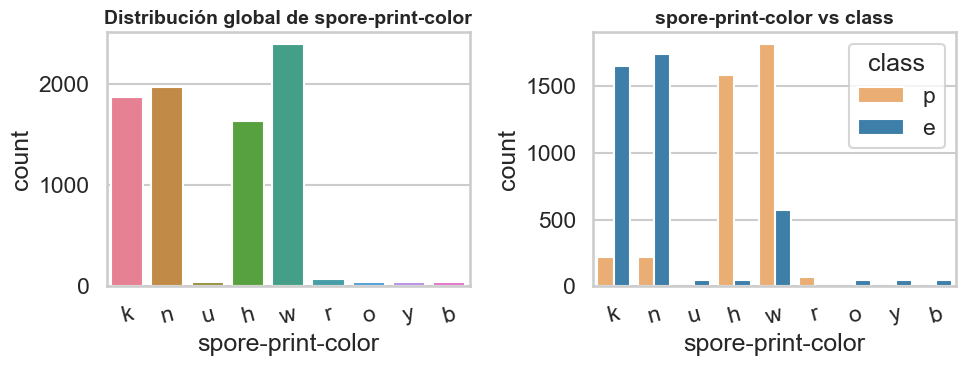

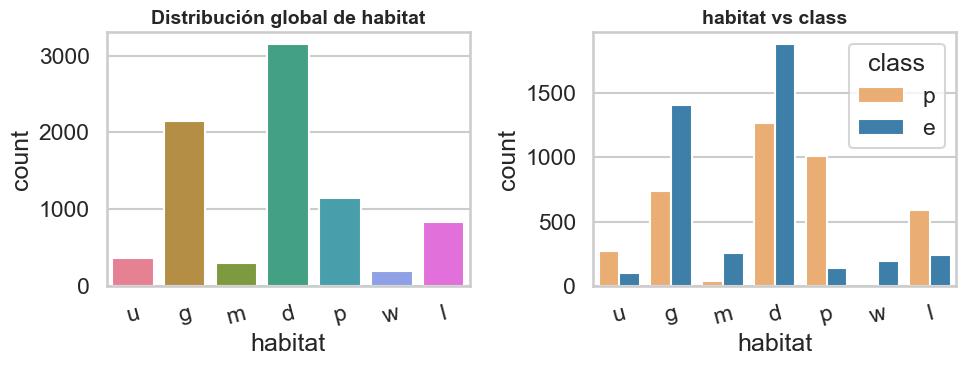

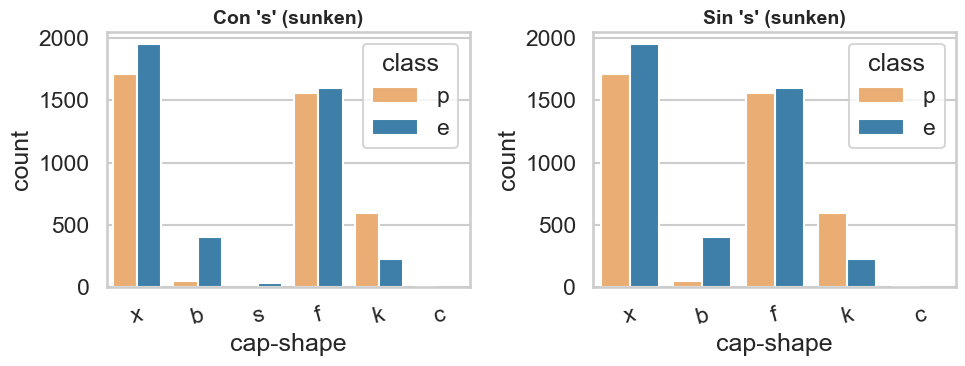

**Conclusión:** La categoría `'s' (sunken)` es extremadamente minoritaria. Se elimina para evitar sesgos en el modelo.**

In [13]:
# Análisis de variables clave
key_vars = ['odor', 'gill-size', 'ring-type', 'spore-print-color', 'habitat']

for var in key_vars:

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.countplot(x=var, hue=var, data=df_clean, palette="husl", legend=False, ax=ax[0])

    ax[0].set_title(f"Distribución global de {var}")

    sns.countplot(x=var, hue='class', data=df_clean, palette=palette_binary, ax=ax[1])

    ax[1].set_title(f"{var} vs class")

    for a in ax: a.tick_params(axis='x', rotation=15)

    plt.tight_layout(); plt.show()



fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=df_clean, x="cap-shape", hue="class", palette=palette_binary, ax=axes[0])

axes[0].set_title("Con 's' (sunken)")

df_no_s = df_clean[df_clean["cap-shape"] != "s"]

sns.countplot(data=df_no_s, x="cap-shape", hue="class", palette=palette_binary, ax=axes[1])

axes[1].set_title("Sin 's' (sunken)")

for a in axes: a.tick_params(axis='x', rotation=15)

plt.tight_layout(); plt.show()



display(Markdown("**Conclusión:** La categoría `'s' (sunken)` es extremadamente minoritaria. Se elimina para evitar sesgos en el modelo.**"))



## Paso 8: Consideraciones sobre outliers y relevancia de `odor`
En datasets categóricos, los outliers no se tratan con métodos numéricos como IQR o z-score. Las categorías raras (como `cap-shape='s'`) se consideran valores atípicos y se eliminan directamente. Por otro lado, la variable `odor` es la más discriminante: ciertos olores (`fétido`, `picante`) indican hongos venenosos.


In [11]:
display(Markdown('''**Conclusión:**  

No se aplican métodos numéricos para outliers, ya que las variables son categóricas.  

La variable `odor` aporta la mayor capacidad discriminativa:  

- `'p'` → olor picante: venenoso  

- `'f'` → olor fétido: venenoso  

- `'a'` o `'n'` → sin olor o almendra: comestible'''))



**Conclusión:**  

No se aplican métodos numéricos para outliers, ya que las variables son categóricas.  

La variable `odor` aporta la mayor capacidad discriminativa:  

- `'p'` → olor picante: venenoso  

- `'f'` → olor fétido: venenoso  

- `'a'` o `'n'` → sin olor o almendra: comestible

## Paso 9: Codificación final con One-Hot Encoding
Finalmente, se realiza la conversión de variables categóricas a formato numérico mediante One-Hot Encoding, dejando el conjunto listo para aplicar PCA, K-Means y Random Forest.


In [18]:
from sklearn.preprocessing import OneHotEncoder

# Preparación final del dataset para modelado
df_final = df_no_s.copy()

# Divide en características (X) y etiqueta (y)
# X representa las características
X = df_final.drop(columns=['class'])

# y representa la etiqueta target (clase)
y = df_final['class']


# One-Hot Encoding de las variables categóricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Transforma las características con One-Hot Encoding
X_ohe = pd.DataFrame(encoder.fit_transform(X), columns=encoder.get_feature_names_out(X.columns))

# Dimensiones tras One-Hot Encoding
display(Markdown("**Dimensión del dataset tras One-Hot:.**"))

display(X_ohe.head())

display(Markdown("**Dataset limpio y preparado para las etapas de modelado (PCA, K-Means, Random Forest).**"))



**Dimensión del dataset tras One-Hot:.**

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Dataset limpio y preparado para las etapas de modelado (PCA, K-Means, Random Forest).**